# Dijkstra libraries visualization
In this notebook the benchmarks of Dijkstra implementations of popular Python graph libraries are visualized.

1. [SciPy](#SciPy)
2. [NetworKit](#NetworKit)
   1. [SSSP-NK](#SSSP-NK)
   2. [SSSTP-NK](#SSSTP-NK)
   3. [Bidirectional Dijkstra](#Bidirectional-Dijkstra)
   4. [Dynamic Dijkstra](#Dynamic-Dijkstra)
3. [graph-tool](#graph-tool)
   1. [SSSP](#SSSP)
   2. [SSSTP](#SSSTP)
4. [NetworkX](#NetworkX)
   1. [SSSP-NX](#SSSP-NX)
   2. [SSSTP-NX](#SSSTP-NX)
   3. [Bidirectional](#Bidirectional)

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern']

In [3]:
def mean_std_max_min(series):
    print("%.2f" %series.mean())
    print("%.2f" %series.std())
    print("%.2f" %series.max())
    print("%.2f" %series.min())


## SciPy 

In [4]:
sssp_df = pd.read_csv('data/bench/dijkstra/scipy_SSSP_res_20.csv',index_col=0)
sssp_df

source       time
0   14910353.0  22.347502
1    7125475.0  25.955134
2    8066180.0  23.335416
3   18886558.0  20.910742
4   17404558.0  22.604857
5    8908193.0  20.694639
6   20108719.0  20.279449
7   20944223.0  20.290679
8   17913939.0  20.963775
9   20709228.0  19.767376
10  20801554.0  19.191486
11  13357712.0  23.385325
12  14315688.0  22.701160
13  22121776.0  20.536990
14   9733252.0  25.180685
15  18718092.0  21.935141
16  16653538.0  22.943356
17  18155713.0  22.853069
18  13721131.0  27.837602
19  19325578.0  20.891762

In [5]:
mean_std_max_min(sssp_df.time)

22.23
2.19
27.84
19.19


In [6]:
sssp_mem_df = pd.read_csv('data/bench/dijkstra/scipy_SSSP_mem_res_20.csv',index_col=0)
sssp_mem_df

source       time      peak_mem      cur_mem
0   17041439.0  22.354913  2.196058e+09  276628292.0
1   11619851.0  24.240623  2.196056e+09  276626608.0
2   17202173.0  23.571915  2.196056e+09  276626400.0
3   12759174.0  24.270993  2.196056e+09  276626289.0
4    8525913.0  25.689399  2.196055e+09  276626289.0
5   18836179.0  21.842660  2.196055e+09  276626234.0
6    3673954.0  21.072275  2.196056e+09  276625760.0
7    6877897.0  21.770126  2.196056e+09  276626289.0
8    5458287.0  20.931675  2.196055e+09  276626344.0
9    6126599.0  22.947239  2.196055e+09  276626289.0
10  16352724.0  22.708162  2.196055e+09  276625760.0
11  17120214.0  25.745312  2.196055e+09  276626179.0
12  17765163.0  23.707525  2.196055e+09  276626172.0
13  10962595.0  26.095631  2.196055e+09  276626286.0
14   3338439.0  21.896761  2.196055e+09  276626289.0
15  13106889.0  23.608252  2.196055e+09  276626344.0
16   4652669.0  23.418906  2.196055e+09  276626286.0
17  13030390.0  24.994715  2.196055e+09  276626289.0
18  13077728.0  24.539366  2.196055e+09  276626231.0
19  18743198.0  22.204735  2.196055e+09  276626519.0

In [7]:
mean_std_max_min(sssp_mem_df.time)

23.38
1.55
26.10
20.93


In [8]:
mean_std_max_min(sssp_mem_df.peak_mem-2.19605*10**9)
print('')
mean_std_max_min(sssp_mem_df.cur_mem)

5537.10
638.20
8132.00
5191.00

276626357.45
496.47
276628292.00
276625760.00


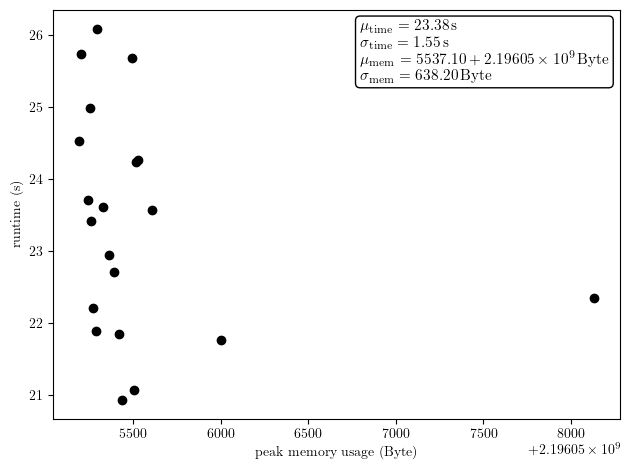

In [9]:
#only plotting the mem df because the overhead seems negligible and I'd need to to histograms, becuase i forgot to use the same sources for the mem run as for the normal run
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'peak memory usage (Byte)')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(sssp_mem_df.peak_mem, sssp_mem_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

text=  (r'\noindent $\mu_{\mathrm{time}} = 23.38 \, \mathrm{s} \newline$'
        r'$\sigma_{\mathrm{time}} = 1.55  \, \mathrm{s} \newline$'
        r'$\mu_{\mathrm{mem}} = 5537.10 + 2.19605 \times 10^9 \, \mathrm{Byte} \newline$'
        r'$\sigma_{\mathrm{mem}} = 638.20  \, \mathrm{Byte} \newline$')

ax1.text(0.98, 0.95, text, fontsize=11, bbox=dict(boxstyle='round', fc='white', ec='black'), transform=ax1.transAxes, horizontalalignment='right')
fig.tight_layout()
plt.savefig('data/vis/dijkstra/scipy_20_mem-t.pdf', format='pdf')
plt.show()

## NetworKit

### SSSP-NK

In [10]:
sssp_df = pd.read_csv('data/bench/dijkstra/nk_SSSP_res_20.csv',index_col=0)
sssp_df

source       time
0   19252538.0  12.813838
1   11674315.0  24.642073
2   11084762.0  27.784677
3    6005777.0  21.770485
4   21112141.0  21.397077
5   22094255.0  19.217304
6   19365572.0  22.005645
7   11852440.0  25.693461
8   21548963.0  21.625643
9    5005130.0  22.364412
10  17013787.0  22.358148
11  16249934.0  21.030678
12  17803163.0  23.887148
13  14573699.0  23.808848
14   8432842.0  23.935806
15  14506363.0  22.616493
16   5543605.0  22.747187
17  14092272.0  23.501097
18  10132978.0  25.584610
19  18780760.0  20.192259

In [11]:
mean_std_max_min(sssp_df.time)

22.45
3.02
27.78
12.81


In [12]:
sssp_mem_df = pd.read_csv('data/bench/dijkstra/nk_SSSP_mem_res_20.csv',index_col=0)
sssp_mem_df

source       time  peak_mem  cur_mem
0   18400261.0  23.877779    3716.0   1738.0
1   13023259.0  26.436145    3753.0   1284.0
2   11196963.0  28.170890    3755.0   1284.0
3   10584319.0  25.940585    3753.0   1336.0
4    8655476.0  27.504272    3755.0   1682.0
5   17852023.0  23.349013    3753.0   1339.0
6   18679643.0  25.115885    4339.0   1284.0
7    8175230.0  23.747804    3755.0   1682.0
8    8586783.0  23.086551    3755.0   1284.0
9   10850789.0  27.928155    4337.0   1281.0
10  17732772.0  22.341493    3757.0   1394.0
11  20289081.0  26.476355    4341.0   1572.0
12  19516032.0  22.243701    3755.0   1284.0
13  18144605.0  24.676877    3757.0   1394.0
14  16206714.0  24.014328    3755.0   1339.0
15   4065625.0  23.705231    3755.0   1682.0
16  19665347.0  23.399338    4341.0   1394.0
17  12057166.0  28.472789    3757.0   1394.0
18  19705821.0  22.522560    4339.0   1284.0
19   6568983.0  26.691768    4629.0   1627.0

In [13]:
mean_std_max_min(sssp_mem_df.time)

24.99
2.06
28.47
22.24


In [14]:
mean_std_max_min(sssp_mem_df.peak_mem)
print('')
mean_std_max_min(sssp_mem_df.cur_mem)

3942.85
304.98
4629.00
3716.00

1427.90
166.22
1738.00
1281.00


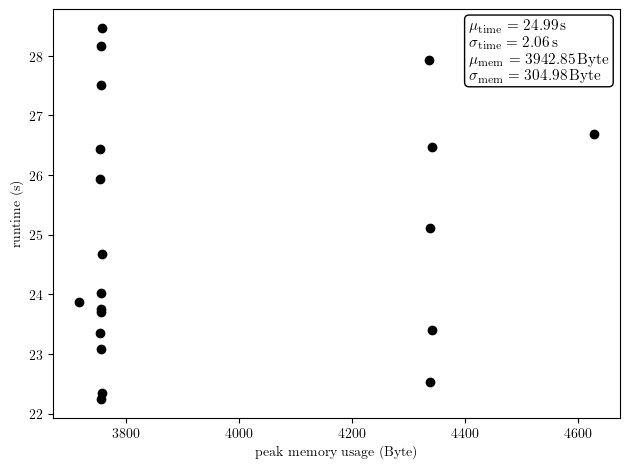

In [15]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'peak memory usage (Byte)')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(sssp_mem_df.peak_mem, sssp_mem_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

text=  (r'\noindent $\mu_{\mathrm{time}} = 24.99 \, \mathrm{s} \newline$'
        r'$\sigma_{\mathrm{time}} = 2.06 \, \mathrm{s} \newline$'
        r'$\mu_{\mathrm{mem}} = 3942.85 \, \mathrm{Byte} \newline$'
        r'$\sigma_{\mathrm{mem}} = 304.98  \, \mathrm{Byte} \newline$')

ax1.text(0.98, 0.95, text, fontsize=11, bbox=dict(boxstyle='round', fc='white', ec='black'), transform=ax1.transAxes, horizontalalignment='right')
fig.tight_layout()
plt.savefig('data/vis/dijkstra/nk_20_mem-t.pdf', format='pdf')
plt.show()

### SSSTP-NK

In [16]:
ssst_df = pd.read_csv('data/bench/dijkstra/nk_SSST_res_20.csv',index_col=0)
ssst_df

source      target  distance       time
0   11827787.0  13590313.0  1.045669   1.046920
1    3360330.0  11651626.0  5.349979  10.246466
2    7279412.0  12441130.0  2.316094   5.607808
3   16079059.0  18202323.0  2.449296   7.506704
4    9593089.0  12103976.0  5.081260  20.361298
5   15459032.0  16639705.0  1.725890   4.431732
6    4605137.0  20703663.0  8.871095  19.094906
7   10805465.0  21151155.0  4.764317  23.540469
8   15275397.0  16080007.0  0.295943   2.919279
9   16206793.0   3157929.0  5.814958  21.046856
10  17178734.0  16116320.0  0.582109   3.288229
11   6743202.0   5190852.0  4.646246   9.263312
12  16388156.0  12899435.0  2.078447   5.691375
13   7415933.0   4043149.0  2.717240   6.911099
14   8021471.0  14385332.0  3.108228   9.841590
15  11958447.0   8174887.0  2.090511   5.141028
16  16237771.0  18821470.0  3.545435  15.519176
17  10166800.0   6501212.0  2.198708   5.232765
18  19021484.0  13489842.0  2.846203   7.153281
19  20797079.0   9226340.0  7.617681  16.065467

In [17]:
ssst_mem_df = pd.read_csv('data/bench/dijkstra/nk_SSST_mem_res_20.csv',index_col=0)
ssst_mem_df

source      target  distance       time  peak_mem  cur_mem
0   19902960.0  16201905.0  2.127063   3.905876    3259.0   1238.0
1   15570434.0  16745311.0  0.700698   1.015898    3333.0    652.0
2   16894817.0   8825317.0  4.688633  12.140581    3380.0   1330.0
3   19899967.0  14272571.0  2.243632   5.210442    3331.0   1236.0
4   20723415.0   4880381.0  6.845906  17.672650    3378.0   1283.0
5    5685370.0  18804093.0  7.955215  20.519591    3960.0   1283.0
6   18232457.0  19558373.0  5.411409  19.570281    4250.0   1571.0
7    1730090.0   4757135.0  3.107591   4.660571    3376.0   1283.0
8   13891240.0    387061.0  6.508889  22.597016    3380.0   1233.0
9   20890646.0  21361897.0  6.297352  17.781798    3376.0   1283.0
10  17934086.0  12455105.0  2.800500   7.524365    3380.0    699.0
11  16613809.0   7930276.0  4.057913  16.283834    3962.0   1283.0
12  11161964.0   4437995.0  4.853045  25.071361    3380.0   1571.0
13   9744206.0  12439875.0  5.713331  21.594872    3378.0   1283.0
14   6791941.0   6701749.0  0.481469   2.776965    3382.0    699.0
15   6335630.0   2331017.0  1.751984   2.541454    3382.0    699.0
16  10908820.0  21281552.0  4.695585  20.220211    3384.0   1283.0
17  13449987.0  11994729.0  0.803872   3.159854    3968.0   1283.0
18  10827558.0  21256461.0  4.981753  22.463980    3382.0   1618.0
19   8175986.0   5647138.0  4.263586  12.286797    3380.0   1330.0

In [18]:
print((ssst_df.time/ssst_df.distance).mean())
print((ssst_df.time/ssst_df.distance).std())
print('')
print((ssst_mem_df.time/ssst_mem_df.distance).mean())
print((ssst_mem_df.time/ssst_mem_df.distance).std())

3.274191669585074
1.9075311028794801

3.16310940671524
1.2234265202034933


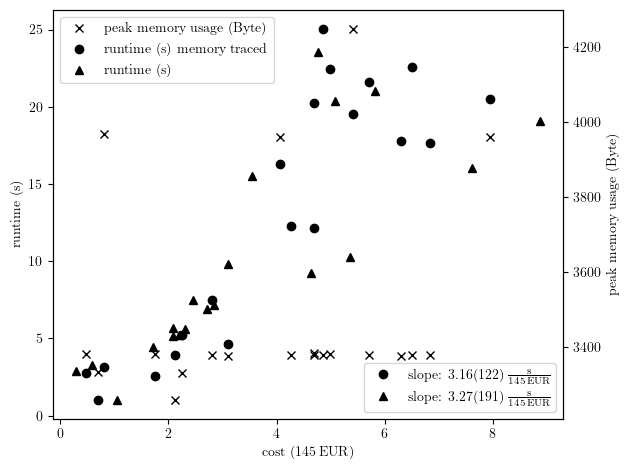

In [19]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(ssst_mem_df.distance, ssst_mem_df.time, marker='o', linestyle = '',color='black')
time2 = ax1.plot(ssst_df.distance, ssst_df.time, marker='^', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'peak memory usage (Byte)')#'# vertices explored'
vert =ax2.plot(ssst_mem_df.distance, ssst_mem_df.peak_mem, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label=r'peak memory usage (Byte)',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label=r'runtime (s) memory traced',linestyle='')
t = mlines.Line2D([], [], color='black', marker='^', label=r'runtime (s)',linestyle='')
ax1.legend(handles=[x,o,t])

o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $3.16(122)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
t_slope = mlines.Line2D([], [], color='black', marker='^', label=r'slope: $3.27(191)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
legend2 = plt.legend(handles=[o_slope,t_slope],loc=4)

fig.tight_layout()
plt.savefig('data/vis/dijkstra/nk_SSST_mem_20.pdf', format='pdf')
plt.show()

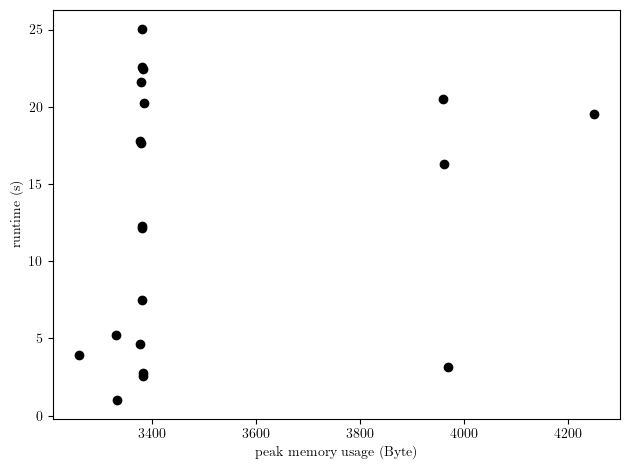

In [20]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'peak memory usage (Byte)')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(ssst_mem_df.peak_mem, ssst_mem_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

fig.tight_layout()
plt.savefig('data/vis/dijkstra/nk_SSST_20_mem-t.pdf', format='pdf')
plt.show()

### Bidirectional Dijkstra

In [21]:
bidi_df = pd.read_csv('data/bench/bidijkstra/nk_BiDi_res_20.csv',index_col=0)
bidi_df

source      target   distance       time
0   21642140.0  11627838.0   5.414951   5.152063
1   16255828.0   8624035.0   5.285515   7.085172
2   11916239.0  18933029.0   4.364025   5.729911
3    1431797.0  16259821.0   7.667649  10.133261
4    4189026.0  18430495.0   6.446916   9.056633
5   21333728.0  10137995.0   5.441113   3.662362
6   17041120.0   4914782.0   5.646084   5.852952
7   11013369.0   8613900.0   2.229352   1.216507
8   20138648.0   4242543.0   7.226346  13.035654
9   20454079.0  14316449.0   2.629378   2.588336
10  10237663.0  18512912.0   4.259496   3.854795
11    956648.0   4617197.0   2.353476   0.855796
12   7591749.0   8405445.0   0.492526   0.222480
13  17061996.0  15063027.0   2.245174   1.749881
14   4069684.0  10452127.0   3.646095   1.622904
15  15590436.0   1395550.0   7.637282  10.541840
16   7653828.0   8569108.0   4.434190   4.821721
17   2668549.0  17317378.0   6.994319   8.195398
18   4404469.0  14948630.0   4.525947   5.889718
19  10443659.0  21947640.0  13.497570   4.798501

In [22]:
bidi_mem_df = pd.read_csv('data/bench/bidijkstra/nk_BiDi_mem_res_20.csv',index_col=0)
bidi_mem_df

source      target  distance       time  peak_mem  cur_mem
0   17161835.0  12064939.0  5.556228   7.625299    3285.0   1363.0
1    2227051.0  10516260.0  3.776456   2.097233    3357.0    723.0
2   10145373.0   3843668.0  3.893657   1.556095    3404.0    770.0
3   17413942.0  14847160.0  1.530219   0.752376    3406.0    626.0
4   22406445.0  15352639.0  4.405205   4.109320    3359.0    626.0
5    7197904.0  13376998.0  3.404954   3.152192    3939.0   1307.0
6    2429812.0   4937542.0  2.547124   1.234350    3307.0    673.0
7   14218199.0  19192962.0  3.721916   5.429151    3357.0    723.0
8   11805701.0  17643095.0  5.623971   8.056920    3357.0   1307.0
9   18380150.0  20530573.0  3.194258   1.760081    3355.0    676.0
10  10627956.0  11509877.0  1.081209   0.410720    3361.0    676.0
11  15831611.0  19813848.0  1.787061   1.102662    4233.0   1595.0
12  20914600.0  22336508.0  5.533277   3.674704    3361.0    723.0
13  20643050.0   8937444.0  5.164194   4.135663    3357.0    723.0
14  18776526.0  15493466.0  5.527246   6.833395    3355.0   1260.0
15  17631957.0   2669943.0  6.815589   7.231935    3357.0   1260.0
16  19663192.0   9898027.0  6.282092  11.191684   11915.0   6869.0
17   6722954.0  11239046.0  2.424730   1.593930    3359.0    676.0
18  16854046.0  13470991.0  4.235219   6.455403    3361.0   1307.0
19  20320635.0  17359920.0  1.376245   0.631778    3357.0    676.0

In [23]:
print((bidi_df.time/bidi_df.distance).mean())
print((bidi_df.time/bidi_df.distance).std())
print('')
print((bidi_mem_df.time/bidi_mem_df.distance).mean())
print((bidi_mem_df.time/bidi_mem_df.distance).std())

0.9808045339725536
0.4101598717652011

0.8892991034486212
0.43672177929511824


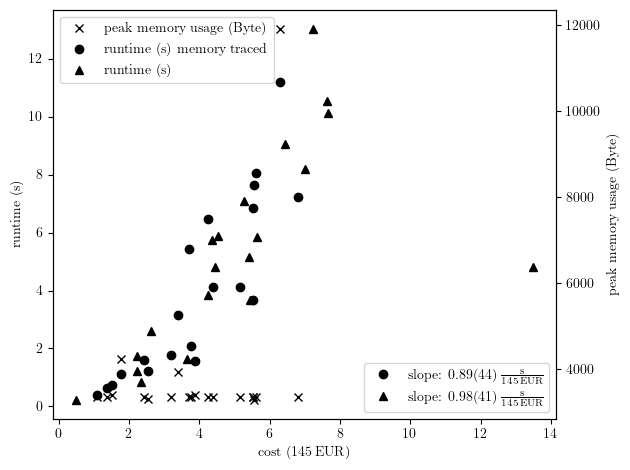

In [24]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(bidi_mem_df.distance, bidi_mem_df.time, marker='o', linestyle = '',color='black')
time2 = ax1.plot(bidi_df.distance, bidi_df.time, marker='^', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'peak memory usage (Byte)')#'# vertices explored'
vert =ax2.plot(bidi_mem_df.distance, bidi_mem_df.peak_mem, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label=r'peak memory usage (Byte)',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label=r'runtime (s) memory traced',linestyle='')
t = mlines.Line2D([], [], color='black', marker='^', label=r'runtime (s)',linestyle='')
ax1.legend(handles=[x,o,t],loc=2)

o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $0.89(44)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
t_slope = mlines.Line2D([], [], color='black', marker='^', label=r'slope: $0.98(41)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
legend2 = plt.legend(handles=[o_slope,t_slope],loc=4)

fig.tight_layout()
plt.savefig('data/vis/dijkstra/nk_bidi_mem_20.pdf', format='pdf')
plt.show()

### Dynamic Dijkstra

In [25]:
dyn_df = pd.read_csv('data/bench/bidijkstra/nk_dyn_res_40.csv',index_col=0)
dyn_df

source      target  distance  distance_post  path_len  time_init  \
0    7592780.0  17850998.0  6.022063       6.103371    2900.0  19.380576   
1   17694144.0  17224499.0  0.860503       0.909194     447.0  25.320755   
2   17039326.0  15460800.0  1.961791       2.051250    1068.0  23.764403   
3   10670820.0  18913994.0  4.043833       4.136149    1918.0  24.062764   
4   12960926.0  12023988.0  2.466065       2.540951    1315.0  26.030389   
5   11784352.0  17258323.0  2.383459       2.405242    1236.0  25.303391   
6    3827115.0   5412981.0  1.306672       1.321592     664.0  20.302697   
7    4645155.0  14461606.0  5.335428       5.439301    2467.0  19.893859   
8   21563585.0  11000182.0  4.639933       4.663821    2369.0  23.569575   
9    8320132.0   9696741.0  4.361716       4.433432    2141.0  22.273210   
10   5412999.0  13818415.0  5.132232       5.268132    2201.0  19.853098   
11  12913213.0  19644273.0  7.164706       7.217920    3824.0  24.516104   
12   2981663.0  13685089.0  4.723987       4.825680    2384.0  19.271052   
13   8246959.0  14573727.0  3.795157       3.880957    1702.0  22.840878   
14  15198858.0  12378430.0  1.194070       1.218000     651.0  24.883006   
15  12919548.0  11522563.0  1.127476       1.193205     331.0  28.096707   
16   1751959.0  21129307.0  8.388791       8.402933    4375.0  19.563056   
17   5070313.0  13210931.0  3.571111       3.574189    1846.0  20.079564   
18   1345525.0   4617228.0  2.246153       2.298478     878.0  19.771977   
19   9241661.0  10063439.0  2.334060       2.405387     879.0  23.045701   
20  15053691.0  10435089.0  3.022100       3.056860    1369.0  26.891675   
21  11952299.0   9914377.0  1.466112       1.488099     651.0  25.411445   
22  21021429.0  17084343.0  1.614934       1.624588     886.0  24.452455   
23   6135309.0   9579968.0  1.894160       1.981726     858.0  23.386390   
24  20437228.0  10851841.0  4.905798       4.993397    2315.0  23.308645   
25   7344028.0  12054493.0  2.162564       2.166656    1119.0  24.102135   
26  18089742.0  15154726.0  5.550781       5.570916    3024.0  25.548731   
27   7347073.0   3947660.0  1.721462       1.748546     806.0  24.376995   
28  16912086.0  12219507.0  2.468280       2.503555    1238.0  26.055614   
29  11767750.0  17133874.0  2.884174       2.918882    1261.0  28.804168   
30  18087232.0  10849627.0  3.753333       3.793673    1865.0  22.892840   
31  14932481.0  16681709.0  0.631645       0.650614     391.0  27.281254   
32  16189779.0  11204983.0  3.340871       3.423763    1528.0  24.549976   
33  11264582.0  14871781.0  1.539558       1.586168     808.0  28.472389   
34   2552894.0  11112970.0  4.640238       4.679486    2148.0  20.186673   
35  16910686.0   8472931.0  4.269107       4.306460    2117.0  26.293919   
36   6615811.0   2963199.0  1.843374       1.915555     876.0  23.449768   
37   3143745.0  17085869.0  7.651540       7.743942    3402.0  19.233291   
38  17692145.0  20957442.0  3.503676       3.562061    1893.0  22.116637   
39  17593655.0   6872443.0  4.603446       4.657484    2416.0  23.466198   

    time_rem   time_post  
0   0.002621   25.017669  
1   0.000300    2.180665  
2   0.000704   32.278865  
3   0.002085   17.708742  
4   0.000748   19.299726  
5   0.001121   33.201549  
6   0.000446    9.128241  
7   0.002122   39.751769  
8   0.002267   34.087543  
9   0.001366   12.523075  
10  0.001879   33.690574  
11  0.002565   15.558244  
12  0.002147   18.115610  
13  0.001599   86.338290  
14  0.000590    4.543511  
15  0.000307  105.783190  
16  0.004026   18.894590  
17  0.001671   14.964992  
18  0.000733   17.598259  
19  0.000586   18.873706  
20  0.001153    9.341082  
21  0.000509    6.896318  
22  0.000893   23.362569  
23  0.000766   29.225273  
24  0.002190   17.958870  
25  0.000980   10.706308  
26  0.001801   28.976594  
27  0.000718    0.591352  
28  0.001056    5.620044  
29  0.001125   32.086643  
30  0.001619   20.977243  
31  0.000398   12.700930  


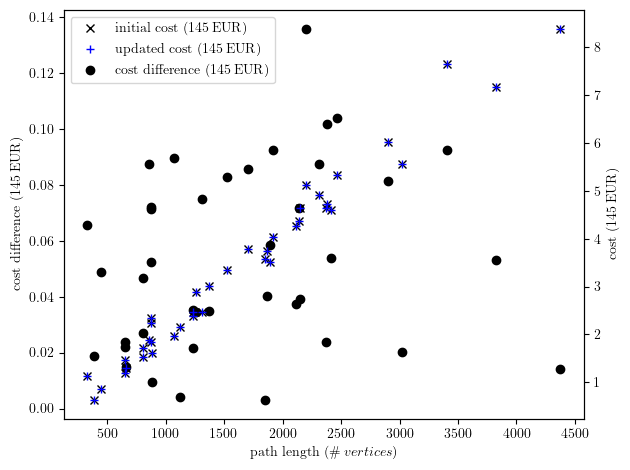

In [26]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'path length $(\# \, vertices) $')
ax1.set_ylabel(r'cost difference ($145\, \mathrm{EUR}$)')
time = ax1.plot(dyn_df.path_len, dyn_df.distance_post-dyn_df.distance, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'cost ($145\, \mathrm{EUR}$)')
vert =ax2.plot(dyn_df.path_len,  dyn_df.distance, marker='x',linestyle = '',color='black')
vert2 =ax2.plot(dyn_df.path_len,  dyn_df.distance, marker='+',linestyle = '',color='blue')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label=r'initial cost ($145\, \mathrm{EUR}$)',linestyle='')
plus = mlines.Line2D([], [], color='blue', marker='+', label=r'updated cost ($145\, \mathrm{EUR}$)',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label=r'cost difference ($145\, \mathrm{EUR}$)',linestyle='')
#t = mlines.Line2D([], [], color='blue', marker='^', label=r'update cost ($145\, \mathrm{EUR}$)',linestyle='')
ax1.legend(handles=[x,plus,o],loc=2)

fig.tight_layout()
plt.savefig('data/vis/dijkstra/nk_dyn_40.pdf', format='pdf')
plt.show()

In [27]:
mean_std_max_min(dyn_df.time_init)

23.55
2.71
28.80
19.23


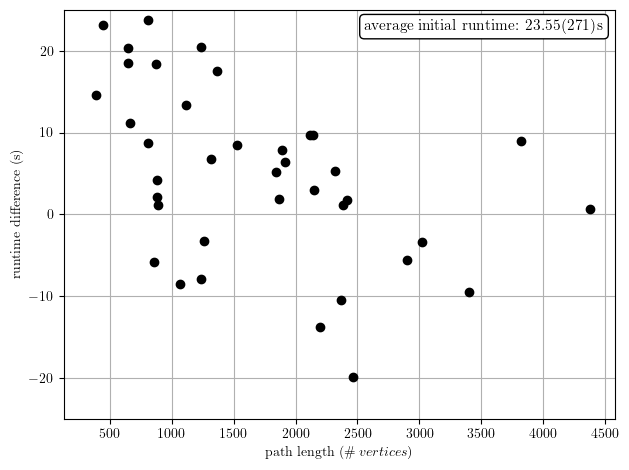

In [42]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'path length $(\# \, vertices) $')
ax1.set_ylabel(r' runtime difference (s)')
time = ax1.plot(dyn_df.path_len, dyn_df.time_init-dyn_df.time_post, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')
ax1.set_ylim(-25,25)
ax1.grid(True)

text=  (r'average initial runtime: $23.55(271) \, \mathrm{s} \newline$')

ax1.text(0.98, 0.95, text, fontsize=11, bbox=dict(boxstyle='round', fc='white', ec='black'), transform=ax1.transAxes, horizontalalignment='right')

fig.tight_layout()
plt.savefig('data/vis/dijkstra/nk_dyn_40_t-dif.pdf', format='pdf')
plt.show()

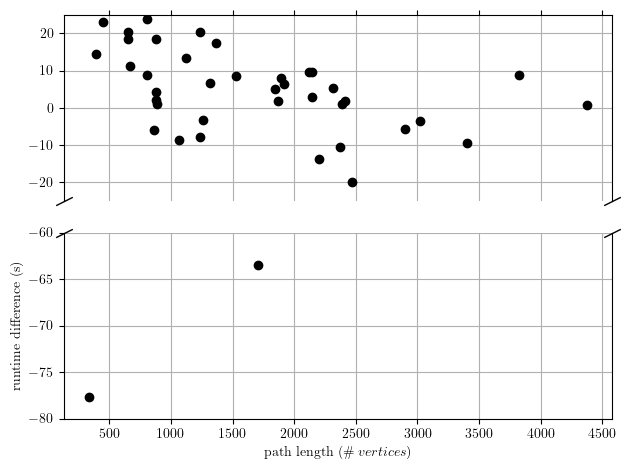

In [29]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
ax2.set_xlabel(r'path length $(\# \, vertices) $')
ax2.set_ylabel(r' runtime difference (s)')
time = ax1.plot(dyn_df.path_len, dyn_df.time_init-dyn_df.time_post, marker='o', linestyle = '',color='black')
time2 = ax2.plot(dyn_df.path_len, dyn_df.time_init-dyn_df.time_post, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')
ax1.set_ylim(-25,25)
ax2.set_ylim(-80,-60)
ax1.grid(True)
ax2.grid(True)
# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the Axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the Axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.tight_layout()
plt.savefig('data/vis/dijkstra/nk_dyn_40_t-dif_outl.pdf', format='pdf')
plt.show()

## graph-tool

### SSSP-GT

In [30]:
sssp_df = pd.read_csv('data/bench/dijkstra/gt_SSSP_res_20.csv',index_col=0)
sssp_df

source        time
0   19017458.0  327.037549
1   18553549.0  326.984326
2   21902481.0  324.229716
3   17173623.0  311.988510
4   19344255.0  314.935330
5   16561898.0  321.509645
6   13378379.0  320.200537
7   19480203.0  313.151369
8   11600339.0  316.412995
9    7781712.0  310.991344
10  15578354.0  311.100223
11  20299887.0  308.860337
12  10945011.0  317.857953
13  15325723.0  316.237886
14   5625344.0  308.188640
15  13659894.0  313.339705
16  17758385.0  313.869660
17  18071725.0  312.304450
18  15513289.0  312.726451
19  12419123.0  313.130461

In [31]:
mean_std_max_min(sssp_df.time)

315.75
5.58
327.04
308.19


In [32]:
#mem tracing takes too long

### SSSTP-GT

In [33]:
ssst_df = pd.read_csv('data/bench/dijkstra/gt_SSST_res_20.csv',index_col=0)
ssst_df

source      target  distance       time   vert_tchd
0    1648621.0  13335857.0  6.028653   5.449508   7480377.0
1   14303726.0  12446641.0  1.319741   1.164945   1518204.0
2   12984362.0  10189189.0  3.522736   9.617814   8998288.0
3   15034046.0  17578424.0  2.619163   2.811818   3332195.0
4    9092521.0  16541989.0  3.633433   8.168660   7905155.0
5   14864504.0  21733469.0  3.703996  10.001975   9530415.0
6   14465605.0  12051033.0  1.957141   2.874035   3180498.0
7   19270773.0  14399325.0  2.729985   4.810905   5060434.0
8    9276875.0  13018632.0  5.447405   2.288451   2610902.0
9   14551366.0  16078363.0  1.571494   1.783271   2176381.0
10  12496150.0   8225421.0  3.340513   4.568074   4589719.0
11   5882130.0  20751708.0  6.483969  12.253846  12943369.0
12  21875666.0  13163241.0  5.737776   7.527980   8720115.0
13  19623303.0  10598562.0  4.626292   9.502772   9646097.0
14  17794595.0  15703806.0  4.725452   6.640793   7280337.0
15  16614833.0   4738724.0  7.340483  15.005134  14222047.0
16  15956347.0   5687913.0  4.675412   8.539929   8421233.0
17   8436299.0   8003667.0  3.090390   4.874818   5286376.0
18   1978646.0  15700596.0  6.146913   5.741921   7833362.0
19   4007211.0  13623993.0  5.692567   7.425271   9208443.0

In [34]:
ssst_mem_df = pd.read_csv('data/bench/dijkstra/gt_SSST_mem_res_20.csv',index_col=0)
ssst_mem_df

source      target  distance       time     peak_mem      cur_mem  \
0   14212085.0   3622304.0  5.088085  11.730358   90886745.0   90883284.0   
1   20197065.0  13423115.0  3.725099   6.646766   57397644.0   57394183.0   
2   20809183.0   2507299.0  7.836954  13.281450  109405486.0  109402025.0   
3   19252516.0   6285814.0  6.137049  11.678489   98392053.0   98388592.0   
4    4101405.0   8067195.0  4.691567   4.487211   40477428.0   40473967.0   
5     473273.0  14697101.0  6.312752   5.166528   59377892.0   59374431.0   
6   18859868.0   6288771.0  5.887811  11.702248   99688933.0   99685472.0   
7   12869114.0   8428498.0  5.748064  11.632329   86250183.0   86246722.0   
8   12374403.0   7436980.0  4.184756  12.307270   85537491.0   85534030.0   
9   15612985.0  18670026.0  2.978488   4.980776   42405017.0   42401556.0   
10   9633144.0  14295026.0  4.161623   5.293350   47305007.0   47301546.0   
11   6728857.0  17513039.0  4.927105   8.367651   75660187.0   75656726.0   
12  12049722.0   3238252.0  5.845160  12.366063   99832018.0   99828557.0   
13   9449043.0  19952952.0  4.440633  12.925088   92456339.0   92452878.0   
14  21478432.0   6987216.0  6.239573   8.039023   71971891.0   71968430.0   
15  10868973.0  19143706.0  4.682613  12.970428   93510337.0   93506876.0   
16    436720.0  20083886.0  9.202277  10.247168  105697088.0  105693627.0   
17  16112318.0  10050030.0  3.109783   6.217257   52115276.0   52111815.0   
18  18994604.0   5676043.0  6.889672  12.045951  103805720.0  103802259.0   
19  17358404.0  10692333.0  4.309594  10.245070   76604437.0   76600976.0   

     vert_tchd  
0   11360020.0  
1    7173954.0  
2   13674841.0  
3   12298256.0  
4    5058841.0  
5    7421543.0  
6   12460249.0  
7   10780500.0  
8   10691362.0  
9    5299934.0  
10   5912297.0  
11   9456770.0  
12  12478172.0  
13  11556270.0  
14   8995643.0  
15  11688027.0  
16  13211277.0  
17   6513716.0  
18  12974910.0  
19   9574794.0

In [35]:
print((ssst_df.time/ssst_df.distance).mean())
print((ssst_df.time/ssst_df.distance).std())
print('')
print((ssst_mem_df.time/ssst_mem_df.distance).mean())
print((ssst_mem_df.time/ssst_mem_df.distance).std())
print('')
print(((ssst_mem_df.peak_mem*10**(-6))/ssst_mem_df.distance).mean())
print(((ssst_mem_df.peak_mem*10**(-6))/ssst_mem_df.distance).std())

1.5519948754703718
0.6085173615121411

1.869002196941678
0.6040319550145455

15.256259397994171
3.4518085788527677


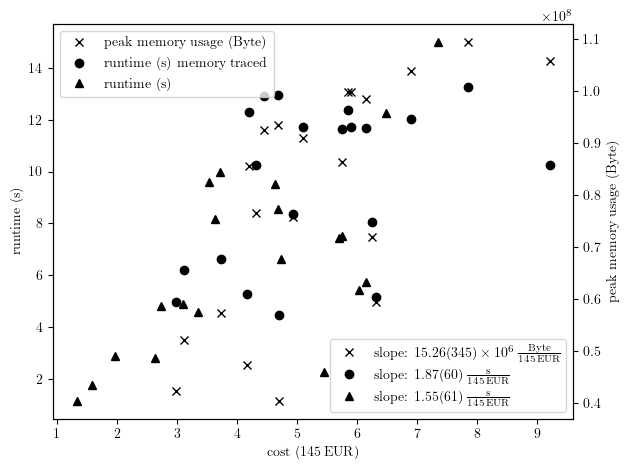

In [36]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(ssst_mem_df.distance, ssst_mem_df.time, marker='o', linestyle = '',color='black')
time2 = ax1.plot(ssst_df.distance, ssst_df.time, marker='^', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'peak memory usage (Byte)')#'# vertices explored'
vert =ax2.plot(ssst_mem_df.distance, ssst_mem_df.peak_mem, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label=r'peak memory usage (Byte)',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label=r'runtime (s) memory traced',linestyle='')
t = mlines.Line2D([], [], color='black', marker='^', label=r'runtime (s)',linestyle='')
ax1.legend(handles=[x,o,t],loc=2)

x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $15.26(345) \times 10^{6} \, \frac{\mathrm{Byte}}{145\, \mathrm{EUR}}$',linestyle='')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $1.87(60)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
t_slope = mlines.Line2D([], [], color='black', marker='^', label=r'slope: $1.55(61)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope,t_slope],loc=4)


fig.tight_layout()
plt.savefig('data/vis/dijkstra/gt_SSST_mem_20.pdf', format='pdf')
plt.show()

In [37]:
print((ssst_df.time/(ssst_df.vert_tchd*10**(-7))).mean())
print((ssst_df.time/(ssst_df.vert_tchd*10**(-7))).std())
print('')
print((ssst_mem_df.time/(ssst_mem_df.vert_tchd*10**(-7))).mean())
print((ssst_mem_df.time/(ssst_mem_df.vert_tchd*10**(-7))).std())
print('')
print((ssst_mem_df.peak_mem/ssst_mem_df.vert_tchd).mean())
print((ssst_mem_df.peak_mem/ssst_mem_df.vert_tchd).std())

9.137395259850942
1.073302911373381

9.596864694206
1.130788207680632

8.00069345858602
0.00023473606970181014


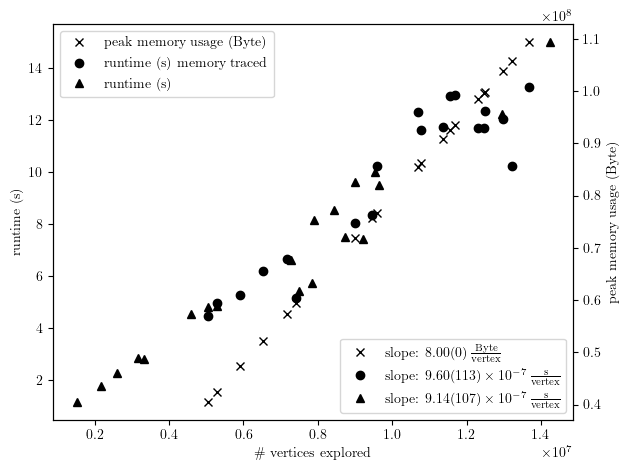

In [38]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'\# vertices explored')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(ssst_mem_df.vert_tchd, ssst_mem_df.time, marker='o', linestyle = '',color='black')
time2 = ax1.plot(ssst_df.vert_tchd, ssst_df.time, marker='^', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'peak memory usage (Byte)')#'# vertices explored'
vert =ax2.plot(ssst_mem_df.vert_tchd, ssst_mem_df.peak_mem, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')



x = mlines.Line2D([], [], color='black', marker='x', label=r'peak memory usage (Byte)',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label=r'runtime (s) memory traced',linestyle='')
t = mlines.Line2D([], [], color='black', marker='^', label=r'runtime (s)',linestyle='')
#legend1 = plt.legend(handles=[x,o,t])

ax1.legend(handles=[x,o,t])

x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $8.00(0) \, \frac{\mathrm{Byte}}{\mathrm{vertex}}$',linestyle='')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $9.60(113) \times 10^{-7} \, \frac{\mathrm{s}}{\mathrm{vertex}}$',linestyle='')
t_slope = mlines.Line2D([], [], color='black', marker='^', label=r'slope: $9.14(107) \times 10^{-7} \, \frac{\mathrm{s}}{\mathrm{vertex}}$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope,t_slope],loc=4)

fig.tight_layout()
plt.savefig('data/vis/dijkstra/gt_vert_tchd-t-mem_20.pdf', format='pdf')
plt.show()

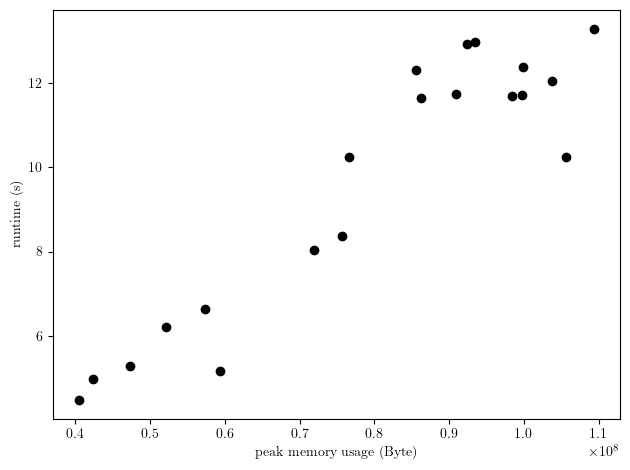

In [39]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'peak memory usage (Byte)')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(ssst_mem_df.peak_mem, ssst_mem_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

fig.tight_layout()
plt.savefig('data/vis/dijkstra/gt_20_mem-t.pdf', format='pdf')
plt.show()

In [40]:
print(((ssst_mem_df.vert_tchd*10**(-6))/ssst_mem_df.distance).mean())
print(((ssst_mem_df.vert_tchd*10**(-6))/ssst_mem_df.distance).std())
print('')
print(((ssst_df.vert_tchd*10**(-6))/ssst_df.distance).mean())
print(((ssst_df.vert_tchd*10**(-6))/ssst_df.distance).std())

1.9068739342979377
0.4314651142142835

1.658313134091835
0.4948685393780431


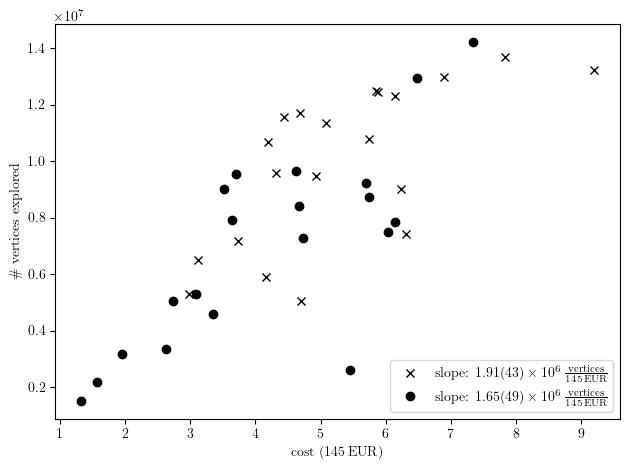

In [41]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR})$')
ax1.set_ylabel(r'\# vertices explored')
ax1.plot(ssst_df.distance, ssst_df.vert_tchd, marker='o', linestyle = '',color='black')
ax1.plot(ssst_mem_df.distance, ssst_mem_df.vert_tchd, marker='x', linestyle = '',color='black')
ax1.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label=r'with memory tracing',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label=r'without memory tracing ',linestyle='')
ax1.legend(handles=[x,o],loc=2)

x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $1.91(43) \times 10^6 \, \frac{\mathrm{vertices}}{145\, \mathrm{EUR}}$',linestyle='')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $1.65(49) \times 10^6 \, \frac{\mathrm{vertices}}{145\, \mathrm{EUR}}$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope],loc=4)

fig.tight_layout()
plt.savefig('data/vis/dijkstra/gt_20_cost-vert_tchd_mem-nonmem.pdf', format='pdf')
plt.show()

## NetworkX

### SSSP-NX

In [4]:
sssp_df = pd.read_csv('data/bench/dijkstra/nx_SSSP_res_20.csv',index_col=0)
sssp_df

source        time
0   16546822.0  196.115700
1   20756809.0  219.849360
2    7260503.0  211.397745
3   14905536.0  210.761729
4   20520081.0  200.715212
5   14727724.0  208.508742
6   12396431.0  207.124719
7   11259121.0  231.322272
8   14955279.0  210.396128
9   10354152.0  210.429414
10  21226142.0  197.423866
11  17443234.0  201.516291
12   9107377.0  224.962266
13   9913649.0  218.132592
14  11341557.0  210.776415
15  16876342.0  231.942823
16  11009040.0  216.471885
17  18869718.0  205.803926
18  17738169.0  205.529353
19  10448603.0  209.553147

In [5]:
mean_std_max_min(sssp_df.time)

211.44
9.96
231.94
196.12


In [6]:
sssp_mem_df = pd.read_csv('data/bench/dijkstra/nx_SSSP_mem_res_20.csv',index_col=0)
sssp_mem_df

source        time  peak_mem  cur_mem
0    8857701.0  205.174890       0.0      0.0
1   11334075.0  219.233885       0.0      0.0
2    6573752.0  214.271149       0.0      0.0
3   12600783.0  219.323318       0.0      0.0
4    9145020.0  221.472858       0.0      0.0
5    8088790.0  196.351135       0.0      0.0
6   17793997.0  206.273598       0.0      0.0
7    1422721.0  198.788376       0.0      0.0
8   18671301.0  193.026420       0.0      0.0
9   11170833.0  218.015187       0.0      0.0
10  11839915.0  219.742590       0.0      0.0
11   1074127.0  199.648124       0.0      0.0
12   5802610.0  205.981510       0.0      0.0
13   8602956.0  207.901276       0.0      0.0
14   2814204.0  199.460248       0.0      0.0
15  13707740.0  213.595345       0.0      0.0
16  15402706.0  213.403696       0.0      0.0
17  21571536.0  204.756424       0.0      0.0
18  18856681.0  193.705109       0.0      0.0
19   1449750.0  199.105396       0.0      0.0

In [7]:
mean_std_max_min(sssp_mem_df.time)

207.46
9.36
221.47
193.03


### SSSTP-NX

Benchmark didn't run because Python kernel kepty dying.

### Bidirectional

In [8]:
bidi_df = pd.read_csv('data/bench/bidijkstra/nx_BiDi_res_20.csv',index_col=0)
bidi_df

source      target  distance        time
0    1146559.0   6078727.0  2.389483   41.262824
1   21584241.0  20675898.0  0.445819    8.097428
2   19592163.0  16512674.0  2.774029  103.767676
3   14238930.0  10655890.0  2.857749   97.847603
4    9658675.0  16627284.0  3.455753  190.844236
5   19642793.0  16864359.0  5.977934  442.554458
6    6638744.0   8354678.0  3.387205  244.314551
7   17038734.0  15152716.0  2.168225   61.441728
8   15135940.0  13151720.0  0.816073    6.399779
9   18937853.0  10049982.0  7.297618  332.557190
10  14471244.0    667330.0  5.987493  630.159938
11  19828116.0  17987069.0  2.664279   94.677512
12  16590691.0  19222100.0  1.830975   45.856900
13  11308540.0  22731465.0  8.100088  963.699993
14  18053168.0  19289015.0  4.042923  148.022778
15   4079077.0  19800098.0  7.158961  832.299704
16   8577565.0  12327453.0  4.178704  366.679563
17  13246876.0  11269719.0  3.482810  213.601144
18  15274622.0  13643662.0  1.605363   22.144695
19  16765973.0  19501015.0  1.470870   18.043562

In [9]:
bidi_mem_df = pd.read_csv('data/bench/bidijkstra/nx_BiDi_mem_res_20.csv',index_col=0)
bidi_mem_df

source      target   distance         time      peak_mem   cur_mem
0   15305170.0  17879543.0   5.305901   561.071721  4.055885e+10  155189.0
1   12685839.0   9773646.0   2.915303   122.735183  1.089951e+10  142737.0
2   14601080.0  18723385.0   1.869824    41.766221  3.137044e+09  134505.0
3   19454928.0  20686064.0   5.810814   171.677916  1.524834e+10  143889.0
4    6239275.0   9299190.0   1.533346    24.307211  1.312179e+09  132025.0
5   21694899.0  16479212.0   2.207477    43.753754  3.004403e+09  136481.0
6   18208335.0  14046505.0   2.463464   114.804863  9.362126e+09  139521.0
7    9945191.0   6623590.0   2.313021    74.280192  5.217681e+09  137201.0
8   22110357.0   5829632.0  14.715168   942.881431  7.886161e+10  159585.0
9    4178298.0  18370072.0   7.210445   698.976454  5.772872e+10  157133.0
10  12231808.0  13924277.0   3.888280   277.883116  2.301378e+10  146785.0
11   6295700.0  11297009.0   5.555679   715.409727  5.545284e+10  151450.0
12   2833005.0   8907689.0   2.638311    92.747036  8.018260e+09  139689.0
13  15405310.0  11194584.0   4.271670   546.539094  4.002413e+10  148699.0
14   9933006.0  15802752.0   5.158181   468.201907  4.104259e+10  146892.0
15   6046055.0  22257469.0   8.164696  1580.953116  1.198252e+11  161997.0
16  12809144.0  18197987.0   7.091337   819.061656  8.063791e+10  160036.0
17   3215338.0   2782323.0   2.989752    28.994300  2.824373e+09  132545.0
18  15923212.0  19319254.0   8.266510   586.338736  5.359278e+10  155105.0
19   4093010.0  11994766.0   4.406689   273.866850  2.463516e+10  145329.0

In [14]:
print((bidi_df.time/bidi_df.distance).mean())
print((bidi_df.time/bidi_df.distance).std())
print(bidi_df.distance.mean())
print('')
print((bidi_mem_df.time/bidi_mem_df.distance).mean())
print((bidi_mem_df.time/bidi_mem_df.distance).std())
print(bidi_mem_df.distance.mean())
print(((bidi_mem_df.peak_mem/bidi_mem_df.distance)*10**(-9)).mean())
print(((bidi_mem_df.peak_mem/bidi_mem_df.distance)*10**(-9)).std())

50.151394160641345
35.05726776576223
3.604617675760528

69.05735265013315
47.9330594610871
4.938793454947882
5.632715916439005
3.8138451698610547


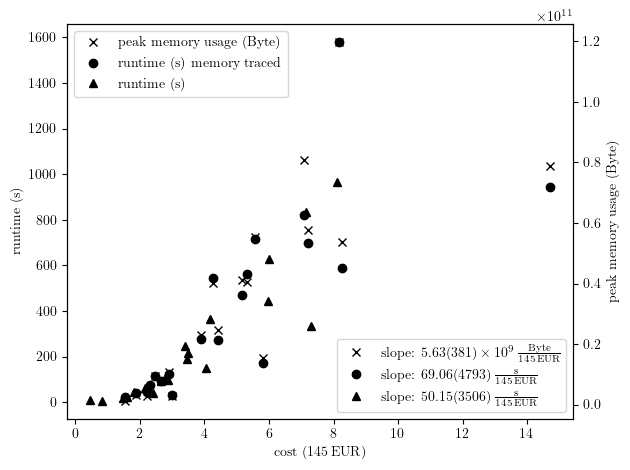

In [16]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(bidi_mem_df.distance, bidi_mem_df.time, marker='o', linestyle = '',color='black')
time2 = ax1.plot(bidi_df.distance, bidi_df.time, marker='^', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'peak memory usage (Byte)')#'# vertices explored'
vert =ax2.plot(bidi_mem_df.distance, bidi_mem_df.peak_mem, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label=r'peak memory usage (Byte)',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label=r'runtime (s) memory traced',linestyle='')
t = mlines.Line2D([], [], color='black', marker='^', label=r'runtime (s)',linestyle='')
ax1.legend(handles=[x,o,t],loc=2)

o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $69.06(4793)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
t_slope = mlines.Line2D([], [], color='black', marker='^', label=r'slope: $50.15(3506)  \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $5.63(381)\times 10^{9} \, \frac{\mathrm{Byte}}{145\, \mathrm{EUR}}$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope,t_slope],loc=4)

fig.tight_layout()
plt.savefig('data/vis/dijkstra/nx_bidi_mem_20.pdf', format='pdf')
plt.show()